But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types

In [43]:
import tensorflow as tf
import numpy as np 
from tensorflow import keras
print(tf.__version__)

2.0.0-beta1


## Start Coding
The fashion MNIST dataset ia available directly in the tf.keras dataset API, You load it like this

In [44]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [45]:
[training_images, training_labels], [testing_images, testing_labels] = mnist.load_data()

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.
### Matplotlib
Matplotlib is a python library used to create 2D & 3D graphs and plots by using python scripts.It supports a very wide variety of graphs and plots namely - Line Plot, Multiple subplot in one, Images,contouring and pseudocolor, Histograms, Paths, 3Dplot, Streamplot, Ellipses, Bar charts, Pie chart, Tabels, GUI widgets, Filled Curves, Data handling, Log plot,polar plot, Legends, Native TeX rendering, TeX-notation, EEG GUI. https://en.wikipedia.org/wiki/Matplotlib , https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

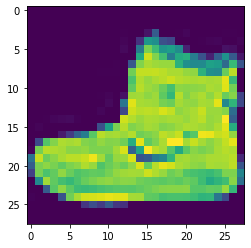

In [46]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

###  Normalization
You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [47]:
training_image = training_images / 255.0
testing_image = testing_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.


In [48]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation = tf.nn.relu),
                            tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

##### Why we use Activation functions with Neural Networks?
It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).
Two Type of activation function
* Linear AF -> Identity f(x) = x
* Non-Linear AF
    |-> Binary Step (0to1) 
    |-> Logistic or sigmoid (0to1)
    |-> Tanh or hyperbolic tangent(-1to1)
    |-> ArcTan 
    |-> Relu (rectified Linear Unit) (0to1) _|
    |-> PRelu(Parametric Relu)
    |->ELU (Exponential Linear Unit)
    |-> SoftPlus
    |-> gaussian
    |->etc https://theffork.com/activation-functions-in-neural-networks/

In [49]:
model.compile(optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [50]:
model.fit(training_image, training_labels, epochs =5 )

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4930 - accuracy: 0.8251
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3736 - accuracy: 0.8643
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3369 - accuracy: 0.8759
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3113 - accuracy: 0.8861
Epoch 5/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2962 - accuracy: 0.8909


Evaluate testing data

In [51]:
model.evaluate(testing_image, testing_labels)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.3627 - accuracy: 0.8696


[0.3627202250123024, 0.8696]

#### Call back

To reduce unwanted training time

In [56]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.6):
            print('\nReached 60 % accuracy so cancelling training!')
            self.model.stop_training = True
callbacks = myCallback()
model.fit(training_image, training_labels, epochs =5, callbacks=[callbacks] )      

Train on 60000 samples
Epoch 1/5
59424/60000 [============================>.] - ETA: 0s - loss: 0.2680 - accuracy: 0.9002
Reached 60 % accuracy so cancelling training!
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2679 - accuracy: 0.9003
